# Import Library

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Import Data dan menginisialkan Variabel untuk membangun model

In [2]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('data.json').read()
intents = json.loads(data_file)

In [3]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])# lemmaztize and lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print(len(documents), "documents")
# classes = intents
print(len(classes), "classes", classes)
# words = all words, vocabulary
print(len(words), "unique lemmatized words", words)


139 documents
61 classes ['Goodbyel', 'Goodbyep', 'Terimakasih', 'acara', 'air_terjun_tiu_kelep', 'budaya_lokal', 'cuaca', 'default', 'eror', 'fasilitas', 'greeting', 'gunung_rinjani', 'hallo', 'heyy', 'informasi_tambahan', 'keamanan', 'kuliner', 'later', 'lokasi', 'lokasi sembaluno', 'lokasi_sembalunq', 'lokasi_sembalunt', 'malam', 'mengapa sembalun', 'mengapa_sembalunl', 'pagi', 'paket_wisata', 'pengalaman', 'penginapan', 'perbatasan_sembaluna', 'perbatasan_sembaluno', 'perpisahan', 'persyaratan_pendakian', 'rekreasi', 'salam', 'sapa', 'see', 'sembalun_lawang', 'sembaluna', 'sembalune', 'sembalunr', 'siang', 'sore', 'terima_kasih', 'terimakasiha', 'terimakasihe', 'terimakasihh', 'terimakasihhh', 'thankyoui', 'thankyouo', 'thankyour', 'tinggal', 'transportasi', 'trek_pendakian', 'waktu_terbaik', 'wilayah_sembalun', 'wilayah_sembalunp', 'wilayah_sembalunr', 'wisata_lainnya', 'wisata_sembalunp', 'wisata_sembalunu']
209 unique lemmatized words [',', '.', 'a', 'acara', 'ada', 'adat', 'adm

# Menyimpan Objek

In [4]:
pickle.dump(words, open('texts.pkl', 'wb'))
pickle.dump(classes, open('labels.pkl', 'wb'))

# Membuat Data pelatihan

In [5]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

In [6]:
training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


<ipython-input-6-a5f8c469b4dd>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


# Membuat Arsitektur Model

In [7]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

#mengompilasi model menggunakan optimizer SGD (Stochastic Gradient Descent)

In [8]:
from tensorflow.keras.optimizers import SGD

# Compile model using the SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


# Training Model

In [9]:
#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('model.h5', hist)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 4.1289 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 3.7816 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 3.8129 - accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 4.0386 - accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 3.7074 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 12ms/step - loss: 3.8166 - accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 3.1145 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 3.1363 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 2.6733 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 17ms/step - loss: 2.6791 - accuracy: 1.0000
E

# Visualisasi Model

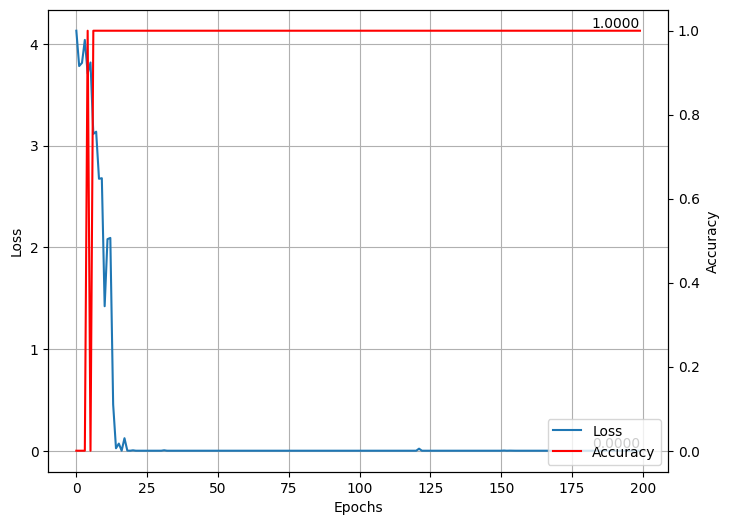

In [11]:
import matplotlib.pyplot as plt

# Membuat figure dan axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot grafik loss
ax1.plot(hist.history['loss'], label='Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.text(len(hist.history['loss'])-1, hist.history['loss'][-1], f'{hist.history["loss"][-1]:.4f}', ha='right', va='bottom')

# Plot grafik akurasi menggunakan sumbu sekunder
ax2 = ax1.twinx()
ax2.plot(hist.history['accuracy'], color='red', label='Accuracy')
ax2.set_ylabel('Accuracy')
ax2.text(len(hist.history['accuracy'])-1, hist.history['accuracy'][-1], f'{hist.history["accuracy"][-1]:.4f}', ha='right', va='bottom')

# Menambahkan legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower right')

# Menampilkan grafik
plt.show()




Save Model

In [ ]:
print("model created")

model created
